In [32]:
import pandas as pd
# This is the close % experiment 
df = pd.read_excel('ixic 5 year.xlsx')
# df = pd.read_excel('IXIC.xlsx')
# df = df[['Close %', '% change today', '% change tomorrow']].astype(float)
p = df['% change today'] > 0
c = p.cumsum()
df['days up in a row'] = c - c.mask(p).ffill().fillna(0).astype(int)
df['close < 50%'] = df['Close %'] < 0.5

# 'close < 50%', 'Close %', 'days up in a row', '% change tomorrow', 'down tomorrow'
df = df[df['Close %'] < 0.5]
df = df[df['% change tomorrow'] > -0.5]
df = df[df['days up in a row'] > 2]
corr = df[['Close %', 'days up in a row', '% change tomorrow', 'down tomorrow']].corr()

corr.style.background_gradient(cmap='coolwarm').set_precision(2)
# 'RdBu_r' & 'BrBG' are other good diverging colormaps



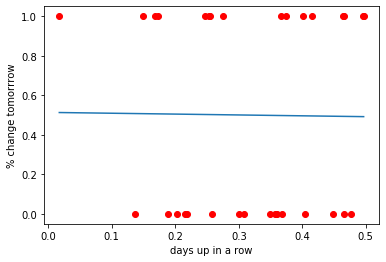

In [37]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
# fig = plt.figure()
# ax = fig.add_axes([0,0,1,1])

x = df['Close %']
y = df['down tomorrow']


# df = df[df['Webby RSI'] > 0.035]
plt.plot(x,y, 'ro')
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
plt.xlabel('days up in a row')
plt.ylabel('% change tomorrrow')
# plt.ylabel('some numbers')
# plt.show()
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(x.to_numpy().reshape(-1,1), y)

In [34]:
reg.coef_[0]

-0.0011083105259178405

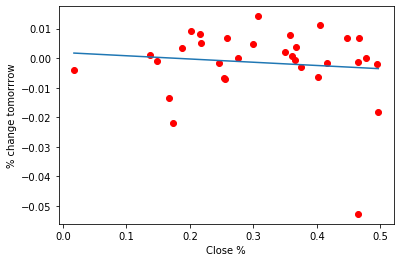

In [35]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
# fig = plt.figure()
# ax = fig.add_axes([0,0,1,1])

x = df['Close %']
y = df['% change tomorrow']


# df = df[df['Webby RSI'] > 0.035]
plt.plot(x,y, 'ro')
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
plt.xlabel('Close %')
plt.ylabel('% change tomorrrow')
# plt.ylabel('some numbers')
# plt.show()
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(x.to_numpy().reshape(-1,1), y)

In [36]:
reg.coef_[0]

-0.0109586474093108

In [2]:
# Webby's RSI vs % change tomorrow
import pandas as pd
df = pd.read_excel('ixic 5 year.xlsx')
past_days = 21
df['21 day MA'] = df.rolling(window=past_days, min_periods=1)['Close'].mean()
df['Webby RSI'] = (df['Low'] - df['21 day MA'])/df['21 day MA']
# df = df[(df['Webby RSI'] < 0.2) & (df['Webby RSI'] > 0.02)]
corr = df[['Webby RSI', '% change tomorrow', 'down tomorrow']].corr()

corr.style.background_gradient(cmap='coolwarm').set_precision(5)
# # 'RdBu_r' & 'BrBG' are other good diverging colormaps


In [41]:
print(df[['Webby RSI', '% change tomorrow']].round(3).sort_values('Webby RSI', ascending=False).to_string())

      Webby RSI  % change tomorrow
1202      0.104             -0.014
1205      0.099             -0.010
1206      0.092             -0.035
1204      0.092              0.014
1203      0.089              0.017
1200      0.079              0.005
1211      0.070             -0.014
1201      0.068              0.039
1213      0.064             -0.003
1214      0.064             -0.032
1199      0.058              0.008
1242      0.057             -0.053
1209      0.056              0.016
1198      0.054              0.026
1208      0.054             -0.000
1212      0.051              0.036
892       0.051             -0.019
1241      0.050              0.007
1210      0.047              0.011
1228      0.047             -0.010
890       0.046              0.007
1240      0.046              0.003
1220      0.046              0.008
78        0.046              0.001
79        0.045             -0.001
1237      0.044             -0.007
1221      0.044             -0.021
1219      0.042     

In [10]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
# fig = plt.figure()
# ax = fig.add_axes([0,0,1,1])
df = df[df['% change tomorrow'] > -0.5]
df = df[df['Webby RSI'] > 0.035]
plt.plot(df['Webby RSI'],df['% change tomorrow'], 'ro')
x = df['Webby RSI']
y = df['% change tomorrow']
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
plt.xlabel('Webby RSI')
plt.ylabel('% change tomorrrow')
# plt.ylabel('some numbers')
# plt.show()
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(x.to_numpy().reshape(-1,1), y)


In [14]:
reg.coef_[0]

-0.10636164499848118

In [12]:
# MA vs % change tomorrow
import pandas as pd
df = pd.read_excel('ixic 5 year.xlsx')
past_days = 21
df[f'21 day MA'] = df.rolling(window=21, min_periods=1)['Close'].mean()
df['Webby RSI'] = (df['Low'] - df['21 day MA'])/df['21 day MA']
for i in range(20,30):    
    df[f'{i} day MA'] = df.rolling(window=i, min_periods=1)['Close'].mean()

# win_type=exponential
df = df[(df['Webby RSI'] < 0.2) & (df['Webby RSI'] > 0.02)]
# corr = df[['Webby RSI', '% change tomorrow', 'down tomorrow']].corr()
df2 = df.copy()
df2 = df2.drop(['Open','High','Low', 'Close', 'Adj Close','Volume'], axis=1)
corr = df2.corr()

corr.style.background_gradient(cmap='coolwarm').set_precision(3)
# # 'RdBu_r' & 'BrBG' are other good diverging colormaps